In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### from sklearn.neighbors import KNeighborsClassifier

Url_heart="https://raw.githubusercontent.com/L0521/hufs-logic-programming/main/heart.csv"

### 자료를 df라고 하자

df = pd.read_csv(Url_heart)

### 자료의 형태
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
### 뒤에서 10개

df.tail(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
### 정보를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values (결측치 확인)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# 결측치가 있을 때 다음과 같이 kNN을 사용한다면 다음과 같다. 결측치를 채워서 data_filled라는 곳에 임시로 넣었다.

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2)

data_filled = imputer.fit_transform(df.iloc[:,1:]) ## diagnosis는 값이 M, B이므로 작동하지 않는다.

print(type(data_filled)) ## numpy array type이기 때문에....

pd.DataFrame(data_filled) ## padas의 DataFrame으로 바꾸어 주었다.

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Url_heart="https://raw.githubusercontent.com/L0521/hufs-logic-programming/main/heart.csv"
df = pd.read_csv(Url_heart)
y_original = df['target']

y_original.unique()

array([1, 0])

In [16]:
y_original.value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
y_original.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
y_original.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [14]:
y_original_2=pd.get_dummies(y_original)

y_original_2.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [15]:
print(y_original_2.columns)

Int64Index([0, 1], dtype='int64')


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], y_original_2[0],stratify=y_original_2[0], random_state=3)
X_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
38,0,2,155,269,0,1,148,0,0.8,2,0,2,1
48,0,2,128,216,0,0,115,0,0.0,2,0,0,1
258,0,0,150,244,0,1,154,1,1.4,1,0,2,0
266,0,0,180,327,0,2,117,1,3.4,1,0,2,0
244,1,0,132,184,0,0,105,1,2.1,1,1,1,0


In [20]:
## 평균 0과 표준편차 1로 변형되었나 확인
X_train.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,0.691630,0.955947,131.577093,246.837004,0.132159,0.533040,149.656388,0.321586,1.051982,1.405286,0.722467,2.312775,0.546256
std,0.462841,1.007844,17.789253,52.186229,0.339412,0.534236,23.666488,0.468117,1.148502,0.626529,1.025160,0.619709,0.498956
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,130.000000,244.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


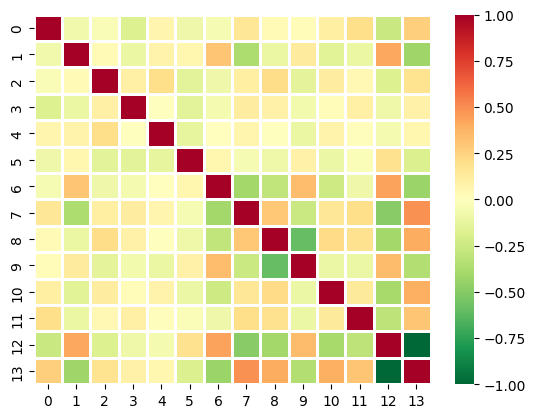

In [21]:
### correlation을 확인해 봅시다.
### 일단 feature와 target값을 합쳐(concatenate) 봅시다.

df_cat = pd.concat([X_train,y_train], axis=1)

corr_mat=np.corrcoef(df_cat,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='RdYlGn_r')
plt.show()

In [22]:
df_cat.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,0
38,0,2,155,269,0,1,148,0,0.8,2,0,2,1,0
48,0,2,128,216,0,0,115,0,0.0,2,0,0,1,0
258,0,0,150,244,0,1,154,1,1.4,1,0,2,0,1
266,0,0,180,327,0,2,117,1,3.4,1,0,2,0,1
244,1,0,132,184,0,0,105,1,2.1,1,1,1,0,1


In [23]:
X_train.shape

(227, 13)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

historyA=model.fit(X_train, y_train, epochs=60, batch_size=15)

Epoch 1/60
16/16 [==============================] - 1s 3ms/step - loss: 0.6639 - binary_accuracy: 0.5947
Epoch 2/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6344
Epoch 3/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6439 - binary_accuracy: 0.6696
Epoch 4/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6373 - binary_accuracy: 0.7004
Epoch 5/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6274 - binary_accuracy: 0.6476
Epoch 6/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6219 - binary_accuracy: 0.6740
Epoch 7/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6169 - binary_accuracy: 0.6828
Epoch 8/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6153 - binary_accuracy: 0.7093
Epoch 9/60
16/16 [==============================] - 0s 2ms/step - loss: 0.6041 - binary_accuracy: 0.7181
Epoch 10/60
16/16 [==============================] - 0s

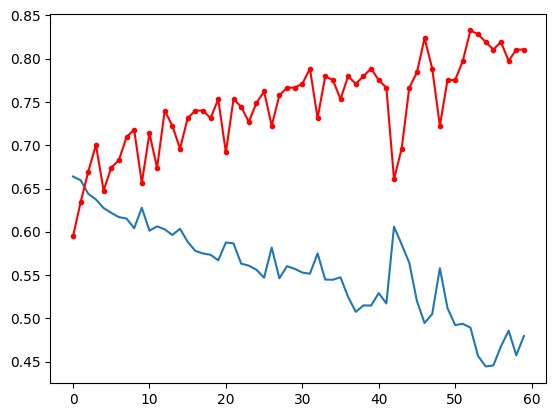

In [25]:
y_loss = historyA.history['loss']
y_accu = historyA.history['binary_accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()

In [26]:
A=X_test.iloc[3,0:].to_numpy()

In [28]:
B=A.reshape(1, 13)

In [29]:
model.predict(B,verbose=0)#[:10]

array([[0.52211493]], dtype=float32)

In [30]:
model.predict(X_test,verbose=0)[:10]

array([[0.7131405 ],
       [0.35878152],
       [0.27431333],
       [0.5221149 ],
       [0.65797913],
       [0.40970096],
       [0.694908  ],
       [0.16615856],
       [0.24558635],
       [0.2961097 ]], dtype=float32)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

random.seed(5)

model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

history=model.fit(X_train, y_train, validation_split=0.25, epochs=60, batch_size=15, verbose=1)

Epoch 1/60
12/12 [==============================] - 1s 22ms/step - loss: 0.7138 - binary_accuracy: 0.4647 - val_loss: 0.6660 - val_binary_accuracy: 0.6491
Epoch 2/60
12/12 [==============================] - 0s 5ms/step - loss: 0.6862 - binary_accuracy: 0.5118 - val_loss: 0.6444 - val_binary_accuracy: 0.6491
Epoch 3/60
12/12 [==============================] - 0s 6ms/step - loss: 0.6842 - binary_accuracy: 0.5118 - val_loss: 0.6336 - val_binary_accuracy: 0.6491
Epoch 4/60
12/12 [==============================] - 0s 5ms/step - loss: 0.6806 - binary_accuracy: 0.5118 - val_loss: 0.6347 - val_binary_accuracy: 0.6491
Epoch 5/60
12/12 [==============================] - 0s 6ms/step - loss: 0.6793 - binary_accuracy: 0.5118 - val_loss: 0.6394 - val_binary_accuracy: 0.6491
Epoch 6/60
12/12 [==============================] - 0s 7ms/step - loss: 0.6767 - binary_accuracy: 0.5118 - val_loss: 0.6395 - val_binary_accuracy: 0.6491
Epoch 7/60
12/12 [==============================] - 0s 6ms/step - loss: 0.6

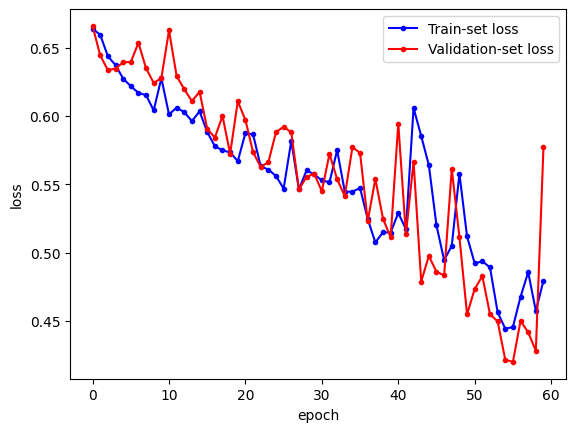

In [37]:
y_val_loss = history.history['val_loss']

plt.plot(x_len,y_loss, marker='.', c="blue", label='Train-set loss')
plt.plot(x_len,y_val_loss, marker='.', c="red",label='Validation-set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

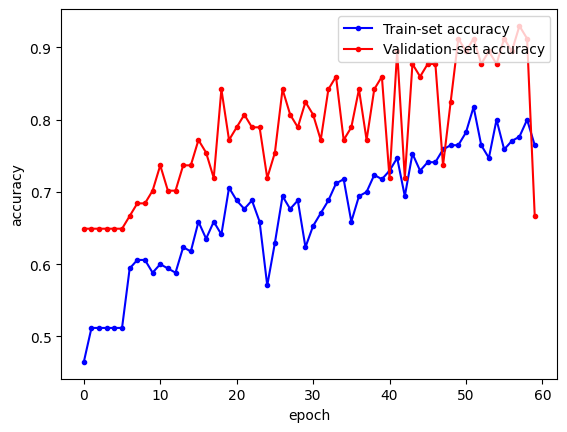

In [38]:
y_accu = history.history['binary_accuracy']
y_val_accu = history.history['val_binary_accuracy']

plt.plot(x_len,y_accu, marker='.', c="blue", label='Train-set accuracy')
plt.plot(x_len,y_val_accu, marker='.', c="red",label='Validation-set accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [35]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.4627 - binary_accuracy: 0.8684


[0.46272724866867065, 0.8684210777282715]